In [35]:
import ROOT,os,glob,math

['./hist/DPSMerge_data_cut0.root', './hist/DPSMerge_data_cut2p5.root', './hist/DPSMerge_data_cut3.root']
cut0 cut2p5 cut3 ['theta_x', 'phi_1', 'phi_2', 'theta_phi_1', 'theta_phi_2']
theta_phi_2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures/DPS_theta_phi_2.jpg has been created
Info in <TCanvas::Print>: pdf file figures/DPS_theta_phi_2.pdf has been created


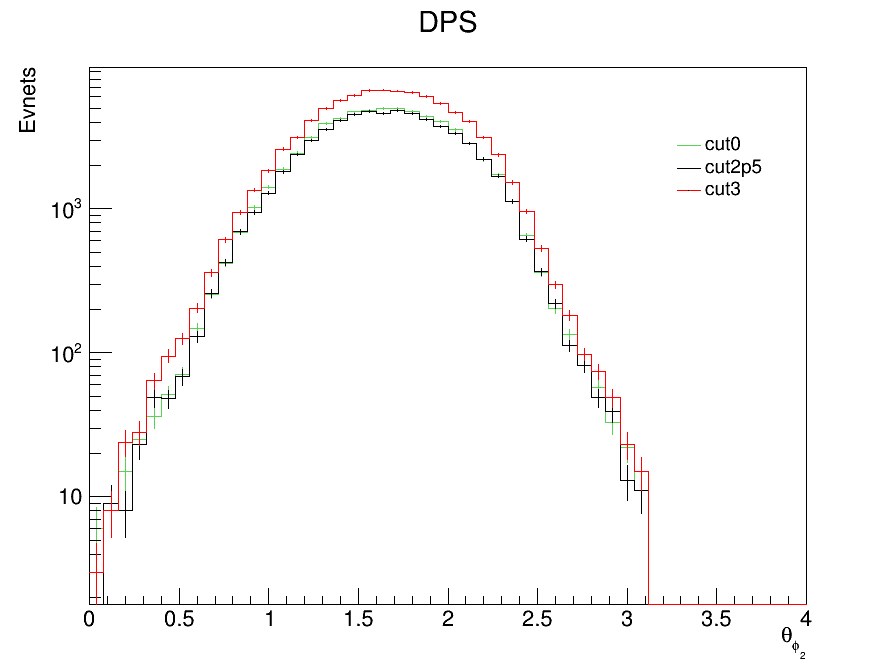

In [41]:
path="./hist/"
paths=glob.glob(path+"DPS*root")
print(paths)
f1=ROOT.TFile(paths[0],"r")
f2=ROOT.TFile(paths[1],"r")
f3=ROOT.TFile(paths[2],"r")
cut1=paths[0].split("_")[-1].split(".")[0]
cut2=paths[1].split("_")[-1].split(".")[0]
cut3=paths[2].split("_")[-1].split(".")[0]
anglelist=[]
for i in f1.GetListOfKeys():
    #print(i.GetName())
    anglelist.append(i.GetName())
print(cut1,cut2,cut3,anglelist)
hist=anglelist[4]
print(hist)
h1=f1.Get(hist)
h2=f2.Get(hist)
h3=f3.Get(hist)
h1.Rebin(4)
h2.Rebin(4)
h3.Rebin(4)
h1.SetNameTitle("","DPS")
#h1.GetXaxis().SetTitle("#theta_{x}")
#h1.GetXaxis().SetTitle("#phi_{#mu_{1}}")
#h1.GetXaxis().SetTitle("#phi_{#mu_{2}}")
#h1.GetXaxis().SetTitle("#theta_{#phi_{1}}")
h1.GetXaxis().SetTitle("#theta_{#phi_{2}}")
h1.GetYaxis().SetTitle("Evnets")
h1.SetLineColor(8)
h2.SetLineColor(1)
h3.SetLineColor(2)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
h1.Draw("hist e")
h2.Draw("same hist e")
h3.Draw("same hist e")
t=ROOT.TLegend(0.75,0.7,0.9,0.8)
t.AddEntry(h1,cut1,"l")
t.AddEntry(h2,cut2,"lp")
t.AddEntry(h3,cut3,"lp")
t.SetBorderSize(0)
t.SetTextSize(0.03)
t.Draw()
c1.Draw()
name="DPS_"+hist
c1.SaveAs("figures/"+name+".jpg")
c1.SaveAs("figures/"+name+".pdf")